In [115]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geometry.angles import *
from geometry.st import *
from geometry.diag import *
from geometry.pc import *

In [117]:
D_final = 750

In [118]:
# Coordenadas P_1
p1n = 2_457.897
p1e =   893.987
pi1 = np.array((p1e, p1n), dtype=np.float_)
pi1

array([ 893.987, 2457.897])

In [119]:
# Coordenadas P_2
p2n = 2_798.806
p2e = 1_000.086
pi2 = np.array((p2e, p2n), dtype=np.float_)
pi2

array([1000.086, 2798.806])

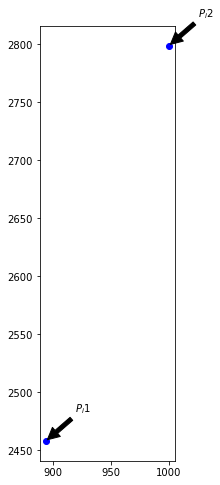

In [120]:
fig, ax = plt.subplots(figsize=(8,8))
coordinates = np.stack((pi1, pi2), axis=1)
ax.set_aspect(1)
ax.scatter(*coordinates, c="blue")
ax.annotate('$P_i 1$', xy=pi1, xytext=pi1+25,
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('$P_i 2$', xy=pi2, xytext=pi2+25,
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

In [121]:
pi1, pi2

(array([ 893.987, 2457.897]), array([1000.086, 2798.806]))

In [122]:
Az_init = np.deg2rad(114.80789)

In [123]:
angle_aux = angle_between_2(pi1, pi2)
np.rad2deg(angle_aux)

array([72.71261415])

In [124]:
np.rad2deg(angle_between_2(pi1, pi2))

array([72.71261415])

In [125]:
angle_1 = angle_aux + Az_init - pi_2 
np.rad2deg(angle_1)

array([97.52050415])

In [126]:
rumbo = np.deg2rad(76.80976)
angle_2 = angle_aux + np.abs(rumbo - pi_2)
np.rad2deg(angle_2)

array([85.90285415])

In [127]:
radios_angulos_1 = np.array( [ (267.880, float(angle_1)) ] )
radios_angulos_1

array([[267.88      ,   1.70205389]])

In [128]:
# Datos curva 2
radios_angulos_2 = np.array( [ ( 98.979, float(angle_2)) ] )
radios_angulos_2

array([[98.979     ,  1.49928764]])

In [129]:
# primera subtangente
st_1 = st_vec(radios_angulos_1)
st_1

array([305.5688757])

In [130]:
# Segunda subtangente
st_2 = st_vec(radios_angulos_2)
st_2

array([92.14265742])

In [131]:
# checar si sale menor
euclid_diff(pi1, pi2) - np.sum((st_1, st_2))

-40.67379830340445

In [132]:
pi1, pi2

(array([ 893.987, 2457.897]), array([1000.086, 2798.806]))

In [133]:
np.rad2deg(angle_between_2(pi1, pi2))

array([72.71261415])

In [134]:
def corregir_coordenada(p1, distancia, p2):
    return coor_p_to_p(p1, distancia, az_between_2(p1, p2))
pi2 = corregir_coordenada(pi1, D_final + st_1 + st_2, pi2)

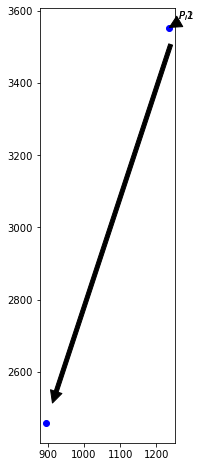

In [135]:
fig, ax = plt.subplots(figsize=(8,8))
coordinates = np.stack((pi1, pi2), axis=1)
ax.set_aspect(1)
ax.scatter(*coordinates, c="blue")
ax.annotate('$P_i 1$', xy=pi1, xytext=pi2+25,
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('$P_i 2$', xy=pi2, xytext=pi2+25,
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

In [140]:
pc_1 = p_total(radios_angulos_1,ci=18_980.687)
pc_1

array([18980.687     , 19436.63319489])

In [136]:
coor_1 = coor_p_to_p(pi1, length=st_1, azimut=Az_init+np.pi)
coor_1

array([ 616.61610918, 2586.10669823])

In [148]:
gamma_1 = gamma(pc_1[0], pc_1[1])
ll_ = ll(radios_angulos_1[0], gamma_1)
coor_2 = coor_p_to_p(coor_1, length=ll_, azimut=Az_init - gamma_1)

In [153]:
coor_2 = coor_p_to_p(pi1, length=st_1, azimut=az_between_2(pi1,pi2))

In [158]:
coor_3 = coor_p_to_p(coor_2, length=D_final, azimut=az_between_2(pi1,pi2))

In [160]:
coor_4 = coor_p_to_p(pi2, length=st_2, azimut=np.pi - rumbo)

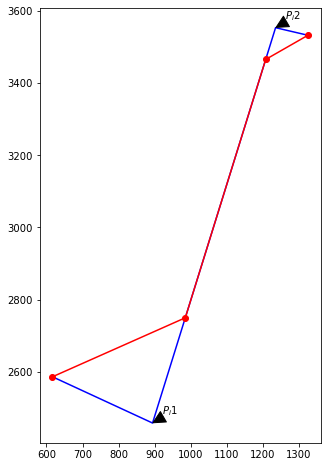

In [163]:
fig, ax = plt.subplots(figsize=(8,8))
coordinates = np.stack((coor_1, pi1, pi2, coor_4), axis=1)
ax.set_aspect(1)
ax.plot(*coordinates, c="blue")
cc = np.stack((coor_1, coor_2, coor_3, coor_4), axis=1)
ax.plot(*cc, "o-", c="red")
ax.annotate('$P_i 1$', xy=pi1, xytext=pi1+25,
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('$P_i 2$', xy=pi2, xytext=pi2+25,
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

In [157]:
np.rad2deg(az_between_2(coor_1,coor_2))

array([66.04763792])

In [152]:
np.rad2deg(radios_angulos_1[0,1])

97.52050415111376